1. Frame the problem (look at the big picture)
2. Get the data
3. Discover and visualize the data to gain insights
4. prepare data for ML algorithms
5. Select a model and train it.
6. Fine-tune the model.
7. Present solution.
8. Deploy solution, monitor, and maintain your system.

1. Big picture
You are tasked to develop a model for housing prices based on census data.
This data contains information about population, median income, number of room, etc. for a whole US state. The smallest unit present in the data is the "block" (which would typically contain houses for 0.6-3.k ppl).

1.1 First question to be asked: qui prodest?
What would be the use of said "model" (a model is seldom the endgame in a ML scenario)?
Let's assume that for this exercise your supervisor states that the model you develop should output a prediction of a dustrict's median house price. This prediction, together with other fields (not specifield in this exercise!) will be fed into a second ML code (also beyond the scope of this exercise; remember, you're most likely a junior member of the team!) that should advise the company to invest/or NOT, in a given area.

NOTE: Consider if any of the above cause you pause and you might think of it as unethical, biased, etc. - and act based on your considerations.

OK, Let's assume that you are still part of the team!
Your first order of business:
a. is your task supervised or unsupervised learning?
b. is your task classification or regression?
c. univariate or multivariate?
d. batch or online learning?

NEXT: select a performance measure
Let's say RMSE (nice and unbiased!)

extra details: you checked w/ the downstream people and found that they want a numerical "house price" as opposed to categoricals like:
"cheap", "moderate", "luxury" for example.



2. Fetch the data

In [1]:
import os
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from six.moves import urllib

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
myHouses = df

In [4]:
myHouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
myHouses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Create the train and test sets

In [6]:
from sklearn.model_selection import train_test_split

# train_test, test_set = train_test_split(myHouses, test_size=0.2, random_state=42)

You find out that income might be an important predictor for housing prices. You need to produce a program that caters to all income levels

In [7]:
myHouses['income_cat'] = np.ceil(myHouses['median_income'] / 1.5)
myHouses['income_cat'].where(myHouses['income_cat']<5, 5.0, inplace=True)
myHouses['income_cat'].head(10)

C:\Users\purpl\AppData\Local\Temp\ipykernel_9020\3058941373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  myHouses['income_cat'].where(myHouses['income_cat']<5, 5.0, inplace=True)


0    5.0
1    5.0
2    5.0
3    4.0
4    3.0
5    3.0
6    3.0
7    3.0
8    2.0
9    3.0
Name: income_cat, dtype: float64

show the distribution of houses.

there are few cheap houses in the start and end, and expensive at the median.

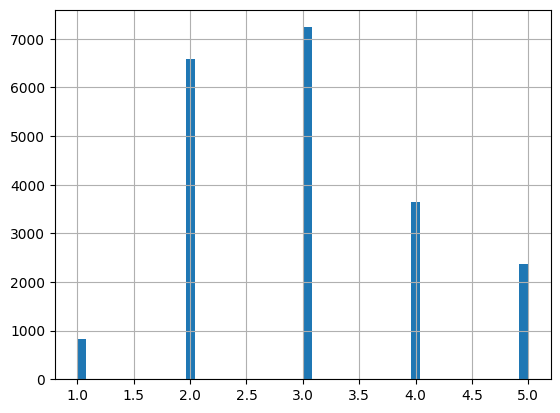

In [8]:
plt.figure(2)
myHouses['income_cat'].hist(bins=50)
plt.show()

now we can use this column to do stratified sampling

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(myHouses, myHouses['income_cat']):
    strat_train_set = myHouses.loc[train_index]
    strat_test_set = myHouses.loc[test_index]

strat_train_set['income_cat'].value_counts() / len(strat_train_set)

income_cat
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: count, dtype: float64

try to get the above values in a different way!!

In [10]:
from collections import Counter

accounter = Counter(strat_train_set['income_cat'])
print(f'{accounter = }')

accounter = Counter({3.0: 5789, 2.0: 5265, 4.0: 2911, 5.0: 1890, 1.0: 657})


plot some geographocal data
get a copy of the data

In [11]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

hh = strat_train_set.copy()

help determine where there is an urban center

In [12]:
# hh.plot(kind='scatter', x='longitude', y='latitude', color='r', alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

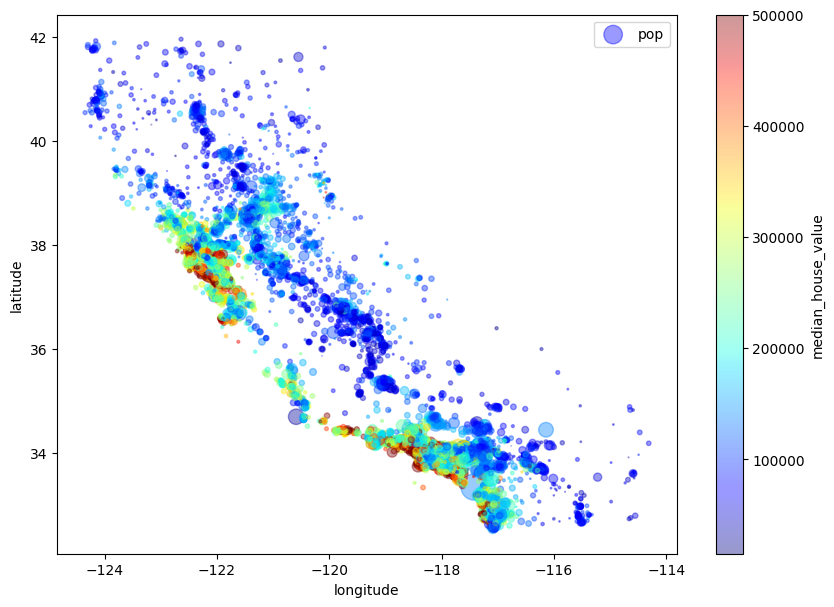

In [13]:
hh.plot(kind='scatter', x='longitude', y='latitude',
        alpha=0.4, s=hh['population']/100, label='pop',
        figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap('jet'),
        colorbar=True)

In [14]:
hh_num = hh.drop('ocean_proximity', axis=1)

try to find which features are correlated with the median_houe
-value

In [15]:
corr_matrix = hh_num.corr()

print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

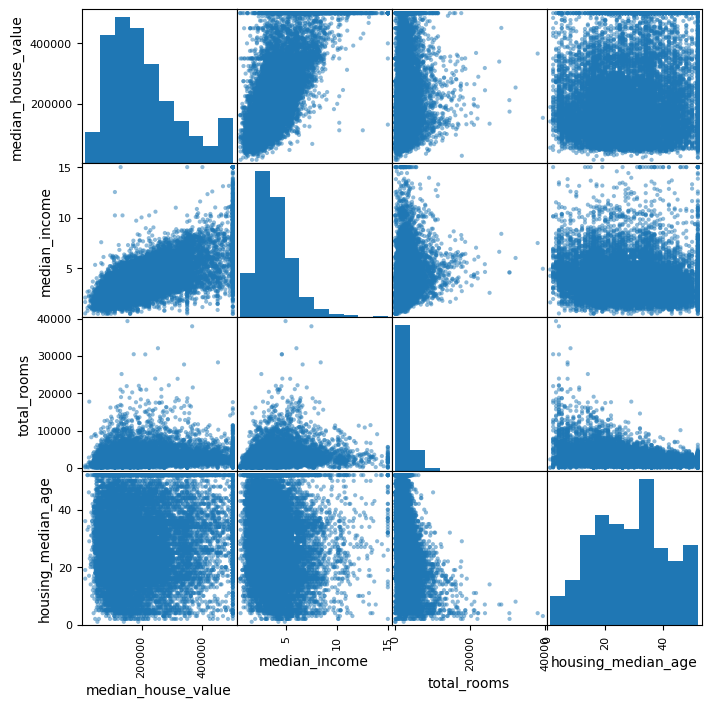

In [16]:
from  pandas.plotting import scatter_matrix

attr = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(hh[attr], figsize=(8,8))

look at the median income more closely

<Axes: xlabel='median_income', ylabel='median_house_value'>

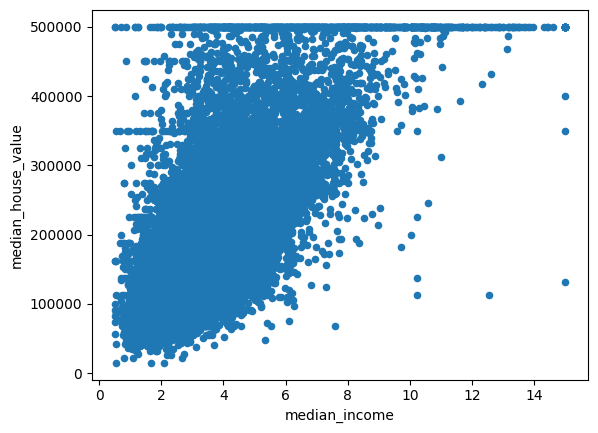

In [17]:
hh.plot(kind='scatter', x='median_income', y='median_house_value')

feature engineering

In [18]:
hh_num['rooms_per_household'] = hh_num['total_rooms'] / hh_num['households']
hh_num['bedrooms_per_room'] = hh_num['total_bedrooms'] / hh_num['total_rooms']
hh_num['population_per_household'] = hh_num['population'] / hh_num['households']

corr_matrix = hh_num.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


data clean-up. missing bedrooms rows

In [19]:
# hh.dropna(subset=['total_bedrooms']) # option 1
# hh.drop('total_bedrooms', axis=1) # option 2
# median = hh['total_bedrooms'].median()
# hh['total_bedrooms'].fillna(median, inplace=True) #option 3

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(hh_num)
X = imputer.transform(hh_num)

In [20]:
hh_tr = pd.DataFrame(X, columns=hh_num.columns)
hh_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   rooms_per_household       16512 non-null  float64
 10  bedrooms_per_room         16512 non-null  float64
 11  population_per_household  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.5 MB


dealing with the categorical information

In [21]:
hh_cat = hh['ocean_proximity']
hh_cat_encoded, hh_categories = hh_cat.factorize()

In [22]:
hh_cat_encoded[:10]

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2], dtype=int64)

In [23]:
hh_categories

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(categories = 'auto')
hh_cat_1hot = encoder.fit_transform(hh_cat_encoded.reshape(-1, 1))

In [25]:
f'Type for 1hot encoding: {type(hh_cat_1hot)}'

"Type for 1hot encoding: <class 'scipy.sparse._csr.csr_matrix'>"

In [26]:
hh_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [27]:
hh_cat_1hot_take2 = pd.get_dummies(hh_cat)
hh_cat_1hot_take2

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,False,True,False,False,False
15502,False,False,False,False,True
2908,False,True,False,False,False
14053,False,False,False,False,True
20496,True,False,False,False,False
...,...,...,...,...,...
15174,True,False,False,False,False
12661,False,True,False,False,False
19263,True,False,False,False,False
19140,True,False,False,False,False


In [28]:
encoder2 = OneHotEncoder(categories='auto', sparse_output=False)

transformer

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_index, bedrooms_index, population_index, household_index = 3,4,5,6


define the class

In [30]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, x, y=None):
        return self
    
    def transform(self, x, y=None):
        rooms_per_household = x[:, rooms_index] / x[:, household_index]
        population_per_household = x[:, population_index] / x[:, household_index]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = x[:, bedrooms_index] / x[:, household_index]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room ]

        else:
            return np.c_[x, rooms_per_household, population_per_household]

In [31]:
attr_adder = CombinedAttributesAdder()

hh_extra_attr = attr_adder.transform(hh.values)

In [32]:
f'houses start shape: {hh.values.shape}'

'houses start shape: (16512, 10)'

In [33]:
f'houses end shape: {hh_extra_attr.shape}'

'houses end shape: (16512, 13)'

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(hh_tr)

StandardScaler()

In [35]:
f'scaler means: {scaler.mean_}'

'scaler means: [-1.19575635e+02  3.56393144e+01  2.86534036e+01  2.62253979e+03\n  5.33939438e+02  1.41968738e+03  4.97011810e+02  3.87588428e+00\n  2.07005322e+05  5.44040595e+00  2.12778560e-01  3.09646921e+00]'

In [36]:
scaler.transform(hh_tr)

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
        -0.12248362,  0.00622264],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.91166333, -0.04081077],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.3709391 , -0.07537122],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
         0.38551382, -0.03743619],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.50680849, -0.05915604],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
        -0.12314147,  0.00657083]])

In [37]:
from sklearn.pipeline import Pipeline, FeatureUnion

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [38]:
class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values
        
    

In [39]:
house_train_labels = strat_train_set['median_house_value'].copy()
house_test_labels = strat_test_set['median_house_value'].copy()

house_train = strat_train_set.drop('median_house_value', axis=1)
house_test = strat_test_set.drop('median_house_value', axis=1)

num_attrib = list(house_train.drop('ocean_proximity', axis=1))
cat_attrib = ['ocean_proximity']

In [40]:
num_pipeline = Pipeline([
    ('selector', DFSelector(num_attrib)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [41]:
cat_pipeline = Pipeline([
    ('selector', DFSelector(cat_attrib)),
    ('cat_encoder', OneHotEncoder(sparse_output=False)),
])

In [42]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [43]:
house_train_prepared = full_pipeline.fit_transform(house_train)
house_test_prepared = full_pipeline.transform(house_test)

MODEL SELECTION AND FITING PART

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [45]:
lin_reg.fit(house_train_prepared, house_train_labels)

LinearRegression()

In [46]:
some_data = house_train_prepared[:10]
some_labels = house_train_labels.iloc[:10]
my_pred = lin_reg.predict(some_data).tolist()

for i in range(10):
    print(f'real price: {some_labels.tolist() [i]:8.2f}\t\tpredicted price: {my_pred[i]:8.2f}')

real price: 72100.00		predicted price: 88256.37
real price: 279600.00		predicted price: 304199.78
real price: 82700.00		predicted price: 154086.25
real price: 112500.00		predicted price: 183870.83
real price: 238300.00		predicted price: 247265.32
real price: 165700.00		predicted price: 207741.59
real price: 412300.00		predicted price: 374565.11
real price: 349600.00		predicted price: 270936.71
real price: 181300.00		predicted price: 154912.28
real price: 500001.00		predicted price:  9533.92


gauge better how good/bad the model's predictions are

In [47]:
from sklearn.metrics import mean_squared_error

house_pred = lin_reg.predict(house_train_prepared)
lin_mse = mean_squared_error(house_train_labels, house_pred)
lin_mse = np.sqrt(lin_mse)

f'Root mean squared for Lin Reg: {lin_mse:8.2f} Dollars'

'Root mean squared for Lin Reg: 68911.09 Dollars'

not too good model using linear

let's try a different model

Decission Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

tree_reg.fit(house_train_prepared, house_train_labels)


DecisionTreeRegressor()

In [49]:
house_pred = tree_reg.predict(house_train_prepared)
tree_mse = np.sqrt(mean_squared_error(house_train_labels, house_pred))

In [50]:
f'Tree mse: {tree_mse}'

'Tree mse: 0.0'

it is Overlearning

Attempt Cross-validation

In [51]:
from sklearn.model_selection import cross_val_score

# K-fold validation: split just the training set into 10 diff. set.
# train on 9 of them and evaluate on the 10th

scores = cross_val_score(tree_reg, house_train_prepared, house_train_labels,
                         scoring='neg_mean_squared_error', cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(alabel, scores):
    print('~~~~~~~~~~~~~~~~~~~~')
    print(f'Cross validation score for {alabel}')
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Std: {scores.std}')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

display_scores('DecisionTreeReg', tree_rmse_scores)

~~~~~~~~~~~~~~~~~~~~
Cross validation score for DecisionTreeReg
Scores: [71787.99208718 69472.88828268 69784.49038841 71975.97700416
 70066.83954996 75287.80768493 75441.75597805 71823.81842029
 70371.55372385 73334.89998013]
Mean: 71934.80230996363
Std: <built-in method std of numpy.ndarray object at 0x000001C5A26ED770>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [53]:
lin_scores = cross_val_score(lin_reg, house_train_prepared, house_train_labels,
                         scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores('LinearReg', lin_rmse_scores)

~~~~~~~~~~~~~~~~~~~~
Cross validation score for LinearReg
Scores: [72338.40387601 64530.64473729 68119.0474831  69120.53858892
 67148.70307804 73040.52281674 71766.52137855 69342.38602167
 66927.59027718 70505.4339031 ]
Mean: 69283.97921605909
Std: <built-in method std of numpy.ndarray object at 0x000001C5B8922CD0>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10)

forest_reg.fit(house_train_prepared, house_train_labels)
house_pred = tree_reg.predict(house_train_prepared)
forest_mse = np.sqrt(mean_squared_error(house_train_labels, house_pred))

forest_scores = cross_val_score(forest_reg, house_train_prepared, house_train_labels,
                                scoring='neg_mean_squared_error', cv=10,
                                error_score=np.nan
                                )

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores('Random forest', forest_rmse_scores)


~~~~~~~~~~~~~~~~~~~~
Cross validation score for Random forest
Scores: [54542.72778178 51920.15469492 49572.60045431 54938.27193204
 49703.72181432 53636.84781865 55495.91866422 52455.52854034
 50785.81285652 58453.66960506]
Mean: 53150.52541621584
Std: <built-in method std of numpy.ndarray object at 0x000001C5B8922A90>
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [55]:
some_data = house_train_prepared[:10]
some_labels = house_train_labels.iloc[:10]
my_pred = forest_reg.predict(some_data).tolist()

for i in range(10):
    print(f'real price: {some_labels.tolist() [i]:8.2f}\t\tpredicted price: {my_pred[i]:8.2f}')

real price: 72100.00		predicted price: 69730.00
real price: 279600.00		predicted price: 317040.00
real price: 82700.00		predicted price: 89210.00
real price: 112500.00		predicted price: 131040.00
real price: 238300.00		predicted price: 228340.00
real price: 165700.00		predicted price: 165420.00
real price: 412300.00		predicted price: 407620.00
real price: 349600.00		predicted price: 292210.00
real price: 181300.00		predicted price: 179840.00
real price: 500001.00		predicted price: 318670.50


saving a ML model for future use

In [56]:
from joblib import dump, load

dump(forest_reg, 'forest01.pkl')

['forest01.pkl']

In [57]:
from joblib import dump

dump(full_pipeline, 'full_pipeline.joblib')


['full_pipeline.joblib']

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming house_test_prepared is your test set features after preprocessing
# and house_test_labels are the true median house values for the test set

# Load the model
forest_model = load('forest01.pkl')

# Predict the test set
test_predictions = forest_model.predict(house_test_prepared)

# Calculate the mean squared error
mse = mean_squared_error(house_test_labels, test_predictions)
rmse = mse ** 0.5

# Calculate the R² score
r2 = r2_score(house_test_labels, test_predictions)

# Calculate the accuracy within ±10% threshold
accuracy_within_10 = np.mean(np.abs((house_test_labels - test_predictions) / house_test_labels) < 0.10) * 100


print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error: 51051.03393687507
R² Score: 0.8000323761896595


use it

In [59]:
from joblib import load
import pandas as pd

forest_model = load('forest01.pkl')
# Assuming new_data is your new dataset similar to the original housing.csv
# For the sake of example, let's use a small portion of the original data as "new data"
new_data = pd.read_csv('housing.csv').iloc[:5]

# Prepare the data using the full_pipeline you've defined
new_data_prepared = full_pipeline.transform(new_data)

# Make predictions
predictions = forest_model.predict(new_data_prepared)

# Display the predictions
print(predictions)


[454650.1 387130.1 360470.  339500.  326730. ]


In [61]:
import pandas as pd
from joblib import load

# Load the model
forest_model = load('forest01.pkl')

# Assume these are the features your model expects, excluding 'median_house_value'
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity'
]

# Collect user input for each feature
user_input = {}
for feature in features:
    # For categorical features like 'ocean_proximity', you might want to provide options
    if feature == 'ocean_proximity':
        print("Enter 'ocean_proximity' (options: NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND):")
    else:
        print(f"Enter {feature}:")
    
    user_input[feature] = input()

# Convert the user input into a DataFrame
input_df = pd.DataFrame([user_input])

# Convert numerical inputs to float and handle categorical features as needed
for feature in features:
    if feature != 'ocean_proximity':  # Assuming all others are numerical
        input_df[feature] = input_df[feature].astype(float)

# Apply preprocessing to the input data using the full_pipeline
input_prepared = full_pipeline.transform(input_df)

# Make a prediction
prediction = forest_model.predict(input_prepared)

print(f"Predicted median house value: {prediction[0]}")


Enter longitude:
Enter latitude:
Enter housing_median_age:
Enter total_rooms:
Enter total_bedrooms:
Enter population:
Enter households:
Enter median_income:
Enter 'ocean_proximity' (options: NEAR BAY, <1H OCEAN, INLAND, NEAR OCEAN, ISLAND):
Predicted median house value: 410000.2


ARTIFICIAL NEURAL NETWORK (ANN)

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Lambda, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping, ProgbarLogger, LambdaCallback
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as k
from tensorflow.keras import regularizers

In [ ]:
model = Sequential()
tmp = house_train_prepared.shape

nlayer = [40, 20, 20, 20, 20, 20]

In [ ]:
epoch_print = 25
epoch_print_callback = LambdaCallback(on_epoch_end= lambda epoch,
                                      logs: print_epoch([epoch, logs]))

In [ ]:
model.add(Dense(nlayer[0], input_dim=tmp[1], activation='relu',
                kernel_initializer = 'he_uniform'))
model.add(Dense(nlayer[1], activation='relu',
                kernel_initializer = 'he_uniform'))
model.add(Dense(nlayer[2], activation='relu',
                kernel_initializer = 'he_uniform'))
model.add(Dense(nlayer[3], activation='relu',
                kernel_initializer = 'he_uniform'))
model.add(Dense(nlayer[4], activation='relu',
                kernel_initializer = 'he_uniform'))
model.add(Dense(nlayer[5], activation='relu',
                kernel_initializer = 'he_uniform'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [64]:
def print_epoch(args):
    x = args[0]
    logs = args[1]
    if x%epoch_print == 0:
        print('Epoch: {:} Loss: {:6.4e} Val_Loss: {:6.4e}'.format(
            x, logs['logs'], logs['val_loss']
        ))

FIT THE MODEL

In [65]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(copy=False)
house_train_labels_save = house_train_labels.copy(deep=True)
house_test_labels_save = house_test_labels.copy(deep=True)

TypeError: copy() got an unexpected keyword argument 'deep'

In [63]:
print('shape1 ', house_train_labels.shape)
house_train_labels = np.array(house_train_labels).reshape(-1, 1)
house_test_labels = np.array(house_test_labels).reshape(-1, 1)
min_max_scaler.transform(house_test_labels)

print('shape 2', house_train_labels.shape)
house_train_labels = np.ravel(house_train_labels)


shape1  (16512,)


NameError: name 'min_max_scaler' is not defined

In [ ]:
history = model.fit(house_train_prepared, house_train_labels,
                    validation_data=
                    (house_test_prepared, house_test_labels),
                    epochs=100, verbose=0,
                    callbacks = [epoch_print_callback])

In [ ]:
train_mse = model.evaluate(house_train_prepared, house_train_labels, verbose = 0)
test_mse = model.evaluate(house_test_prepared, house_test_labels, verbose=0)
print('Train: %.6f, Test: %.6f' % (train_mse, test_mse))

In [ ]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'][10:], label = 'train')
plt.plot(history.history['val_loss'][10:], label='test')
plt.yscale('log')
plt.legend()

In [62]:
tmp = np.array([train_mse]).reshape(-1,1)
train_error = min_max_scaler.inverse_transform(tmp)[0]-min_max_scaler.data_min_[10]
print('Train set avg $$ diff.: ', train_error)
tmp = np.array([test_mse]).reshape(-1,1)
test_error = min_max_scaler.inverse_transform(tmp) [0] -min_max_scaler.data_min_[0]
print('Test set avg $$ diff.: ', test_error)
plt.show()

NameError: name 'train_mse' is not defined